### Data Incubator Capstone Project

### Project Title: To predict the number of infectious people a long time and identifying the trend of COVID-19 infection a long time

## Introduction 
Corona virus Disease 2019 (COVID-2019) is the newly headache infectious disease of the world. As a result of this disease, many people have been infected, hospitalized and dying from time to time. It was identified in Hubei province of china in December 2019  for the first time and it has been quickly spreading through  out the world. This become a challenging disease to the world. Officies, Schools, colleges, and many business centers: restaurants, clubs and other business centers become closed as a result of it. Many IT related workers are working from home. Thus, plenty of  workers become unemployed. They are sitting at home keeping government help for their daily activity expenses.To analyze the data some statistical model will be applied such as multiple linear regression and other models 


### Data structure
In this project, I will use the Corona Virus Disease 19(COVID_19) data set which is publicly posted. The data set contains a record from December,2019 till March 31,2020 contains a bout 8102 records world wide in  about 202 countries. In addition to this data set, a county level data set of USA will be used so as to have an insight in the county and city level distribution in US. The size of the data is continuously growing from time to time, for a time being, records till march 31,2020 will be used for the exploratory data analysis.  


### Exploratory Data Analysis

 In this analysis we will use different statistical methods so as to have an insight on the data. Tables, bar charts, line graphs will be used to have some information on the nature of the data.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### World data set: infected cases and died individuals

In [2]:
## World data set
df_covid=pd.read_csv('C://Users//awele//Desktop//Aklilu_resume//Data_incubator_3trial//Data_incubator_covid_19_worldwide.csv',parse_dates=['dateRep'])
df_covid.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,2020-04-01,1,4,2020,25,0,Afghanistan,AF,AFG,37172386.0
1,2020-03-31,31,3,2020,27,0,Afghanistan,AF,AFG,37172386.0
2,2020-03-30,30,3,2020,8,1,Afghanistan,AF,AFG,37172386.0
3,2020-03-29,29,3,2020,15,1,Afghanistan,AF,AFG,37172386.0
4,2020-03-28,28,3,2020,16,1,Afghanistan,AF,AFG,37172386.0


In [3]:
df_covid[['cases','deaths']].describe().round(3)

,cases,deaths
count,8102.000,8102.000
mean,105.307,5.170
std,796.918,46.178
min,-9.000,0.000
25%,0.000,0.000
50%,0.000,0.000
75%,8.000,0.000
max,24998.000,971.000


In [6]:
# countriesAndTerritories of Cases_on_an_international_conveyance_Japan is -ve value so that it looks ilogical
## lets delete that variable
df_covid=df_covid[df_covid['cases']!=-9]
df_covid[['cases','deaths']].describe().round(3)

,cases,deaths
count,8101.000,8101.000
mean,105.321,5.170
std,796.967,46.181
min,0.000,0.000
25%,0.000,0.000
50%,0.000,0.000
75%,8.000,0.000
max,24998.000,971.000


In [7]:
df_covid_world=df_covid[['dateRep','day','month','year','cases','deaths','countriesAndTerritories']]
df_covid_world.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories
0,2020-04-01,1,4,2020,25,0,Afghanistan
1,2020-03-31,31,3,2020,27,0,Afghanistan
2,2020-03-30,30,3,2020,8,1,Afghanistan
3,2020-03-29,29,3,2020,15,1,Afghanistan
4,2020-03-28,28,3,2020,16,1,Afghanistan


In [8]:
df_covid_world_=df_covid_world.copy()
df_covid_world_['year_month']=df_covid_world_['year'].astype('str')+'-'+ df_covid_world_['month'].astype('str')

In [10]:
## the distribution of infected and died individuals accross the five month: Dec2019,Jan2020,Feb2020,march2020,apprile
## for a time being i discurd the data for Aprile since only for one date date is included
df_mnthyear=df_covid_world_[['year_month','cases','deaths']].groupby(['year_month']).sum()
df_mnthyear.drop('2020-4',axis=0,inplace=True)
df_mnthyear

,cases,deaths
year_month,,
2019-12,27,0
2020-1,9799,213
2020-2,75377,2708
2020-3,692603,34349


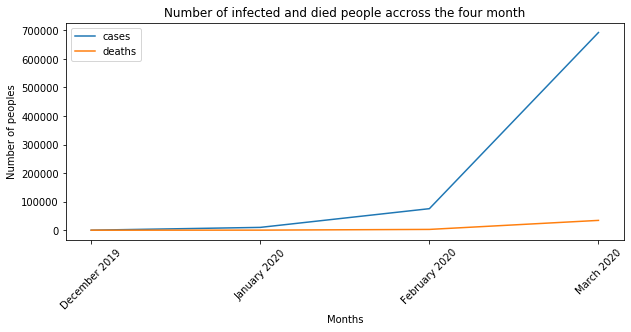

In [18]:
df_mnthyear.plot(kind='line',rot=45,figsize=(10,4))
plt.title('Number of infected and died people accross the four month')
plt.ylabel('Number of peoples')
plt.xlabel('Months')
plt.xticks(range(4),['December 2019','January 2020','February 2020','March 2020'])
plt.show()

#### >>> The above graph reviels that as the time goes the number of infected and died people are increasing especially after january

#### <<>> Since in March  the number of infected cases in the world is highly increased. Lets have a look that month distribution

In [56]:
df_covid[['dateRep','cases','deaths']].reset_index()
df_covid_wdindex=df_covid[['dateRep','cases','deaths']].set_index('dateRep')
df_covid_wdindex.head()

,cases,deaths
dateRep,,
2020-04-01,25,0
2020-03-31,27,0
2020-03-30,8,1
2020-03-29,15,1
2020-03-28,16,1


In [57]:
## to select all February cases
df_covid_wdindex_March=df_covid_wdindex.loc['2020-03-01':'2020-03-31']
df_covid_wdindex_March_=df_covid_wdindex_March.groupby('dateRep').sum()
df_covid_wdindex_March_.head()

,cases,deaths
dateRep,,
2020-03-01,1821,58
2020-03-02,2044,67
2020-03-03,1596,72
2020-03-04,2413,84
2020-03-05,2239,80


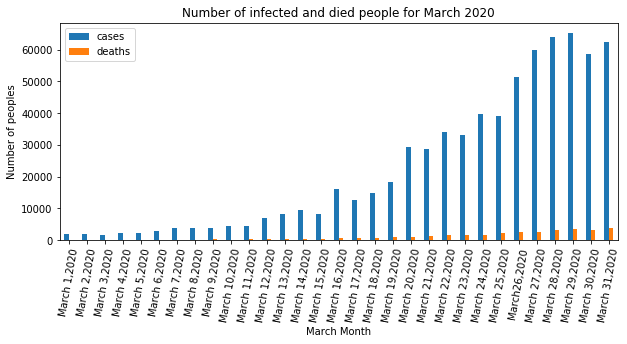

In [59]:
df_covid_wdindex_March_.plot(kind='bar',rot=80,figsize=(10,4))
plt.title('Number of infected and died people for March 2020')
plt.ylabel('Number of peoples')
plt.xlabel('March Month')
plt.xticks(range(31),['March 1,2020','March 2,2020','March 3,2020','March 4,2020','March 5,2020','March 6,2020','March 7,2020',
                      'March 8,2020','March 9,2020','March 10,2020','March 11,2020','March 12,2020','March 13,2020','March 14,2020',
                      'March 15,2020', 'March 16,2020', 'March 17,2020', 'March 18,2020', 'March 19,2020', 'March 20,2020', 
                      'March 21,2020', 'March 22,2020', 'March 23,2020', 'March 24,2020', 'March 25,2020', 'March26,2020', 
                      'March 27,2020', 'March 28,2020', 'March 29,2020','March 30,2020','March 31,2020'])
plt.show()

#### Top 20 Countries which has high number of infected and died people   

In [19]:
df_covid_world_ordered=df_covid_world[['countriesAndTerritories','cases','deaths']].groupby(['countriesAndTerritories']).sum().sort_values(['cases','deaths'],ascending=False)
df_covid_world_top20=df_covid_world_ordered.head(20)
df_covid_world_top20['Death_Rrate%']=(df_covid_world_top20['deaths']/df_covid_world_top20['cases'])*100
df_covid_world_top20

C:\Users\awele\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,cases,deaths,Death_Rrate%
countriesAndTerritories,,,
United_States_of_America,189618,4079,2.151167
Italy,105792,12430,11.749471
Spain,94417,8189,8.673226
China,82295,3310,4.022116
Germany,67366,732,1.086602
France,52128,3523,6.758364
Iran,44606,2898,6.496884
United_Kingdom,25150,1789,7.113320
Switzerland,16108,373,2.315620


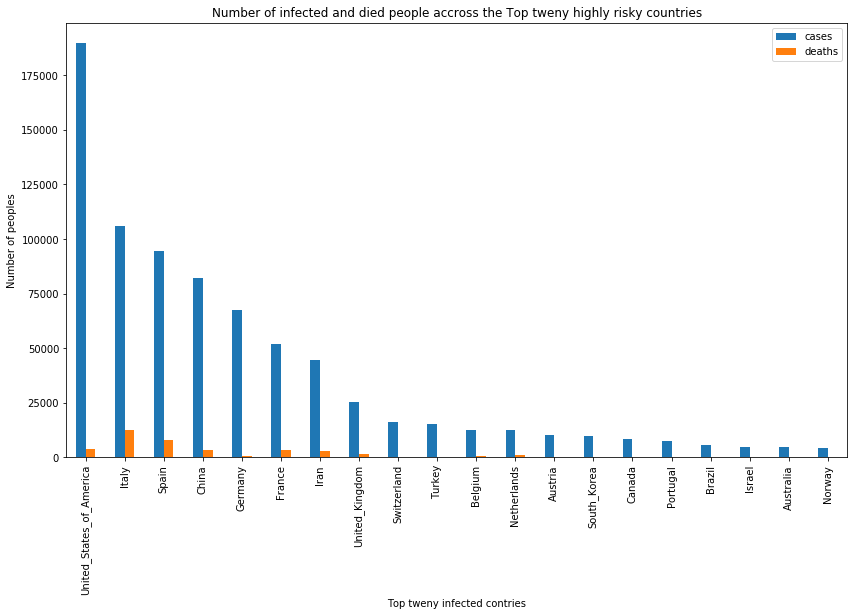

In [23]:
## the bar graph of infected and dies peoples
df_covid_world_top20[['cases','deaths']].plot(kind='bar',rot=90,figsize=(14,8))
plt.title('Number of infected and died people accross the Top tweny highly risky countries')
plt.ylabel('Number of peoples')
plt.xlabel('Top tweny infected contries')
plt.show()

####>>> As shown in the above bar chart figure USA,italy,Spain,Chaina are the first,second,third,fourth ranked countries

#### List 20 Countries which has high number of infected and died people   

In [24]:
df_covid_world_ordered_=df_covid_world[['countriesAndTerritories','cases','deaths']].groupby(['countriesAndTerritories']).sum().sort_values(['cases','deaths'],ascending=True)
df_covid_world_list20=df_covid_world_ordered_.head(20)
df_covid_world_list20

,cases,deaths
countriesAndTerritories,,
Falkland_Islands_(Malvinas),0,0
Papua_New_Guinea,1,0
Saint_Vincent_and_the_Grenadines,1,0
Sierra_Leone,1,0
South_Sudan,1,0
Timor_Leste,1,0
Anguilla,2,0
Burundi,2,0
Belize,3,0


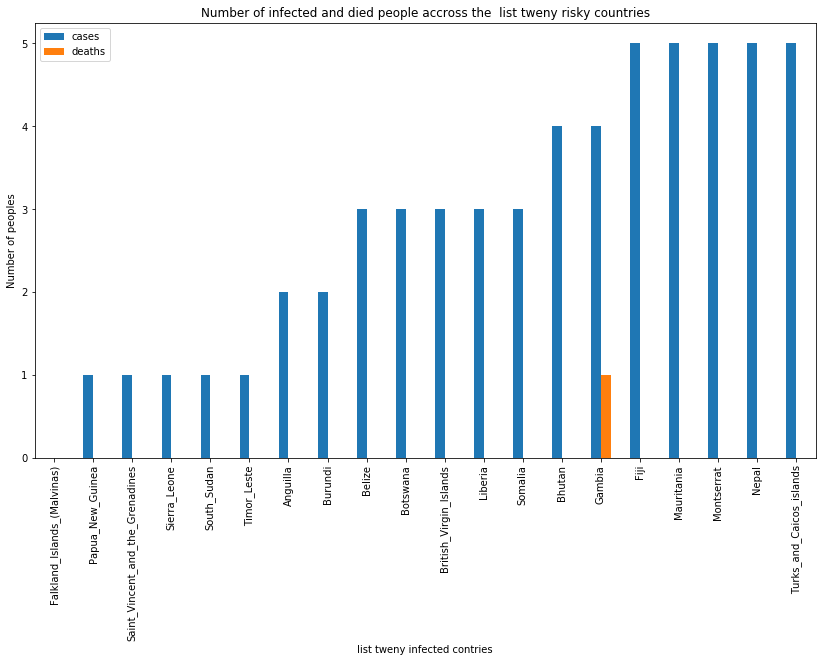

In [25]:
df_covid_world_list20.plot(kind='bar',rot=90,figsize=(14,8))
plt.title('Number of infected and died people accross the  list tweny risky countries')
plt.ylabel('Number of peoples')
plt.xlabel('list tweny infected contries')
plt.show()

In [27]:
## World data set
df_covid_us=pd.read_csv('C://Users//awele//Desktop//Aklilu_resume//Data_incubator_3trial//Data_incubator_covid_countrieslabel.csv',parse_dates=['date'])
df_covid_us.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


#### lets have an insight to the ten states which are highly affected

In [40]:
df_covid_us_top20=df_covid_us[['state','cases','deaths']].groupby('state').sum().sort_values('cases',ascending=False).head(20)
df_covid_us_top20.head(10)

,cases,deaths
state,,
New York,463593,6057
New Jersey,92534,1214
California,55721,1115
Washington,45215,2378
Michigan,39200,967
Florida,35595,489
Massachusetts,34447,341
Illinois,33689,448
Louisiana,28928,1139


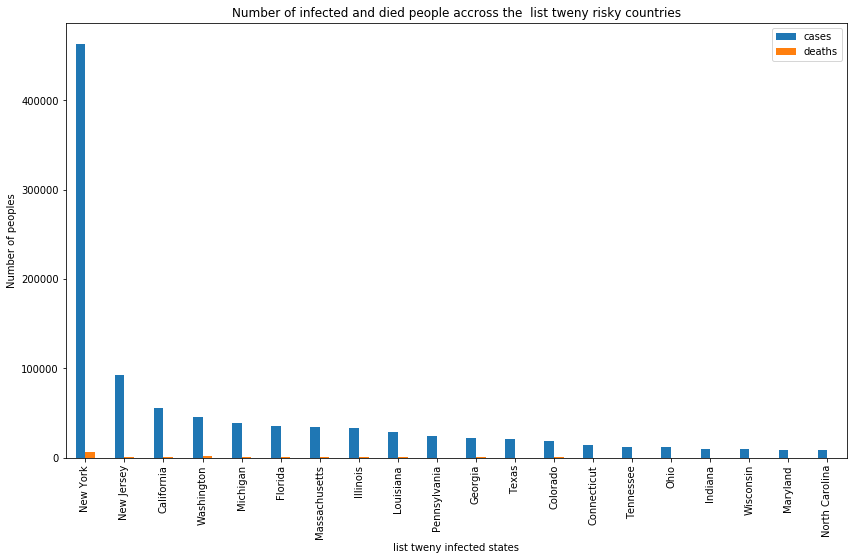

In [41]:
df_covid_us_top20.plot(kind='bar',rot=90,figsize=(14,8))
plt.title('Number of infected and died people accross the  list tweny risky countries')
plt.ylabel('Number of peoples')
plt.xlabel('list tweny infected states')
plt.show()

#####  >> in US Newyork,New Jerssy,California,Washington,Michigan ranked as first,second,third,fourth,fivth respectively as  highly affected countries

In [42]:
df_covid_us_top20['Death_Rate%']=(df_covid_us_top10['deaths']/df_covid_us_top10['cases'])*100
df_covid_us_top20.head(10)

,cases,deaths,Death_Rate%
state,,,
New York,463593,6057,1.306534
New Jersey,92534,1214,1.311950
California,55721,1115,2.001041
Washington,45215,2378,5.259317
Michigan,39200,967,2.466837
Florida,35595,489,1.373788
Massachusetts,34447,341,0.989927
Illinois,33689,448,1.329811
Louisiana,28928,1139,3.937362


#### >> Washington, louisiana,Michigan,California is ranked as first,second,third and fourth Country respectively in death rate

In [46]:
## lets asses countly wise of some states
df_covid_us_state_county_20=df_covid_us[['state','county','cases','deaths']].groupby(['state','county']).sum().sort_values('cases',ascending=False).head(20)
df_covid_us_state_county_20.head(10)

cases  deaths
state      county                       
New York   New York City  267072    5143
           Westchester     67787      94
           Nassau          50077     291
           Suffolk         36038     303
Illinois   Cook            24716     262
Washington King            23460    1834
Michigan   Wayne           19026     426
New Jersey Unknown         18860      70
California Los Angeles     16184     268
New Jersey Bergen          16103     300

#### lets have an insight the counties of New York since it is the one highly affected one

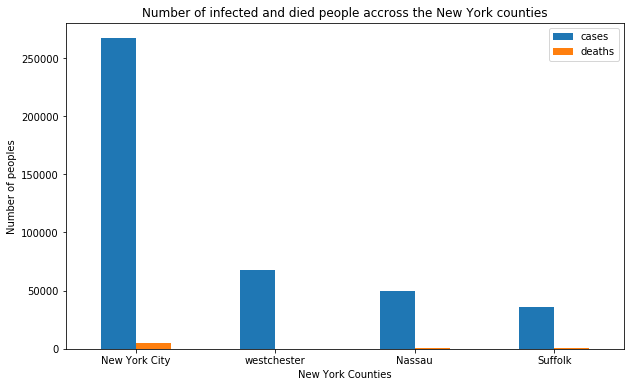

In [60]:
## the bar graph of the infected and died people in Newyork counties
df_covid_us_state_county_20.head(4).plot(kind='bar',rot=360,figsize=(10,6))
plt.title('Number of infected and died people accross the New York counties')
plt.ylabel('Number of peoples')
plt.xlabel('New York Counties')
plt.xticks(range(4),['New York City','westchester','Nassau','Suffolk'])
plt.show()